In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

train_features = pd.read_csv("data/train_features.csv")
train_labels = pd.read_csv("data/train_labels.csv")
test_features = pd.read_csv("data/test_features.csv")
test_labels = pd.read_csv("data/test_labels.csv")
pca_train_features = pd.read_csv("data/reduced_train_features.csv")
pca_test_features = pd.read_csv("data/reduced_test_features.csv")

print(np.shape(train_features))
print(np.shape(train_labels))
print(np.shape(test_features))
print(np.shape(test_labels))

(834, 36)
(834, 1)
(358, 36)
(358, 1)


## On Initial Training Data

Accuracy: 0.10614525139664804


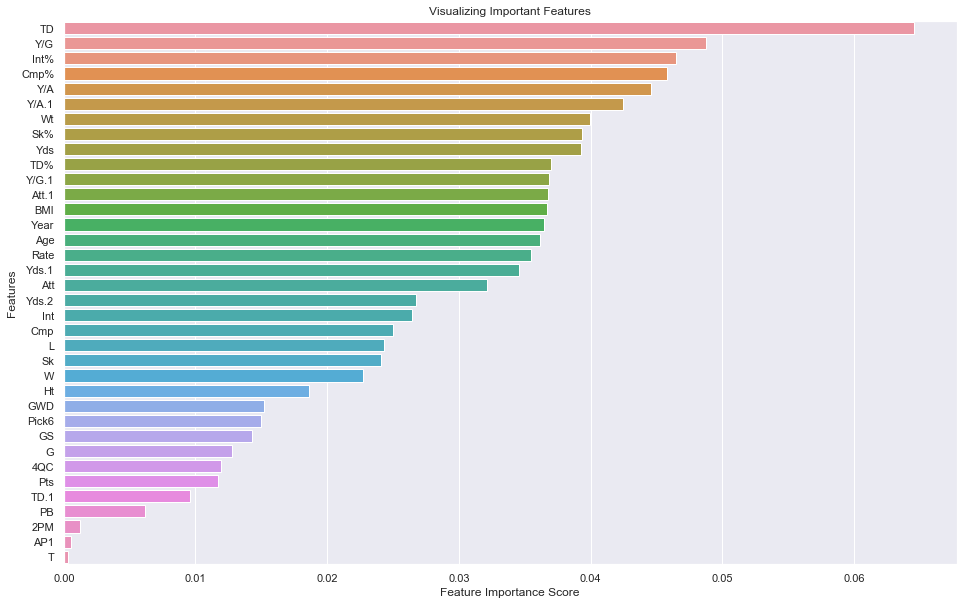

In [44]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features=0.9, max_depth=None)
clf.fit(train_features,np.ravel(train_labels))
pred_labels=clf.predict(test_features)
print("Accuracy:",metrics.accuracy_score(test_labels, pred_labels))
feature_imp = pd.Series(clf.feature_importances_,index=test_features.columns).sort_values(ascending=False)

%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## On PCA Training Data

Accuracy: 0.12011173184357542


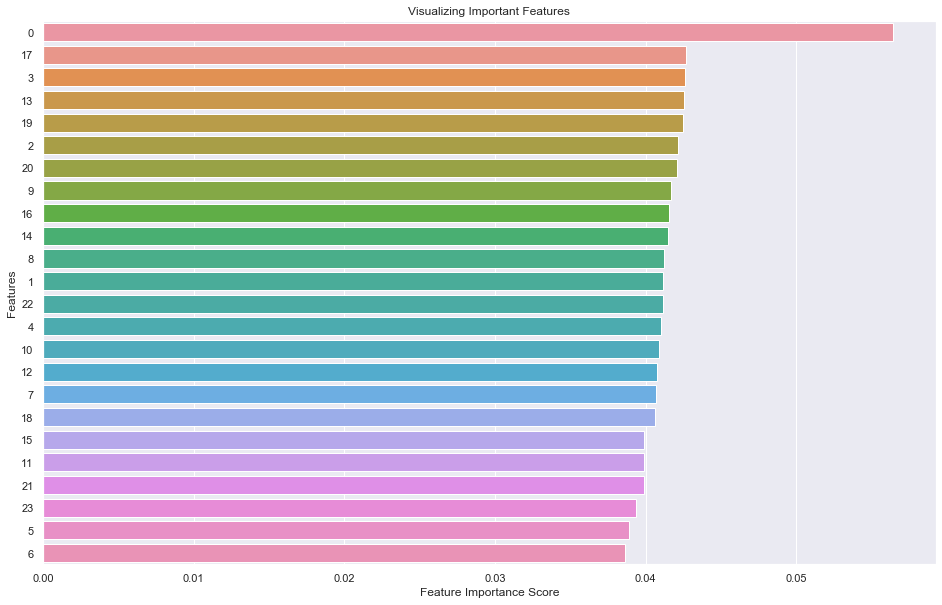

In [45]:
clf = RandomForestClassifier(n_estimators=200, max_depth=100)
clf.fit(pca_train_features,np.ravel(train_labels))
pred_labels=clf.predict(pca_test_features)
print("Accuracy:",metrics.accuracy_score(test_labels, pred_labels))
feature_imp = pd.Series(clf.feature_importances_,index=pca_test_features.columns).sort_values(ascending=False)

%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## 4 Category Breakdown (0-4, 5-8, 9-12, 13-16 wins)

In [46]:
train_labels = pd.read_csv("data/train_labels.csv")
test_labels = pd.read_csv("data/test_labels.csv")

for i in range(train_labels.size):
    if train_labels.iloc[i,0] <= 4:
        train_labels.iloc[i,0] = 0
    elif train_labels.iloc[i,0] <= 8:
        train_labels.iloc[i,0] = 1
    elif train_labels.iloc[i,0] <= 12:
        train_labels.iloc[i,0] = 2
    else:
        train_labels.iloc[i,0] = 3
for i in range(test_labels.size):
    if test_labels.iloc[i,0] <= 4:
        test_labels.iloc[i,0] = 0
    elif test_labels.iloc[i,0] <= 8:
        test_labels.iloc[i,0] = 1
    elif test_labels.iloc[i,0] <= 12:
        test_labels.iloc[i,0] = 2
    else:
        test_labels.iloc[i,0] = 3

In [48]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None)
clf.fit(train_features,np.ravel(train_labels))
pred_labels=clf.predict(test_features)
print("Accuracy:",metrics.accuracy_score(test_labels, pred_labels))
feature_imp = pd.Series(clf.feature_importances_,index=test_features.columns).sort_values(ascending=False)

Accuracy: 0.4860335195530726


## 2 Category Breakdown (0-8, 9-16 wins)

In [49]:
train_labels = pd.read_csv("data/train_labels.csv")
test_labels = pd.read_csv("data/test_labels.csv")

for i in range(train_labels.size):
    if train_labels.iloc[i,0] <= 8:
        train_labels.iloc[i,0] = 0
    else:
        train_labels.iloc[i,0] = 1
for i in range(test_labels.size):
    if test_labels.iloc[i,0] <= 8:
        test_labels.iloc[i,0] = 0
    else:
        test_labels.iloc[i,0] = 1

#### Initial Training Data

Accuracy: 0.7486033519553073


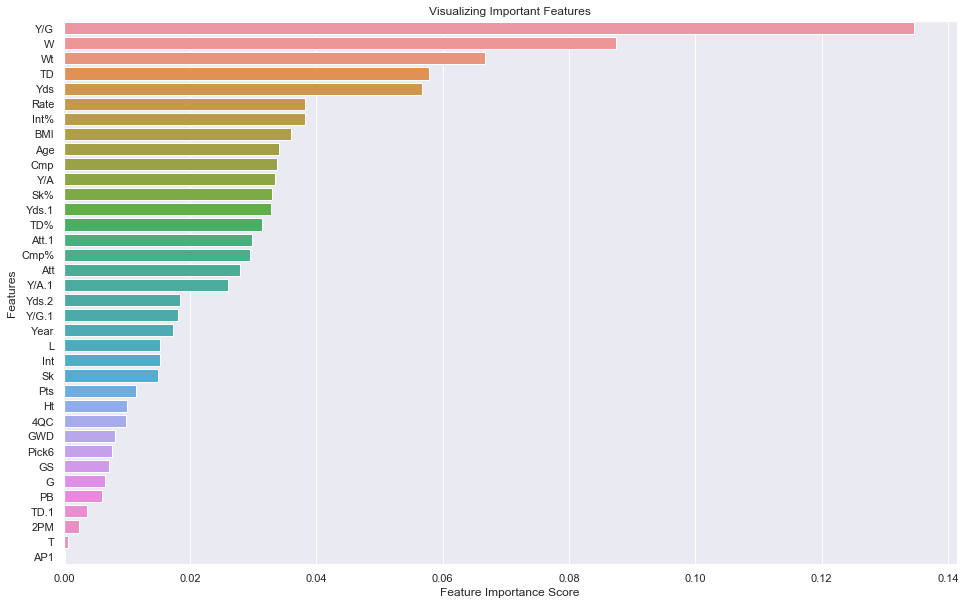

In [55]:
clf = RandomForestClassifier(n_estimators=200, max_features=0.9, criterion='entropy', max_depth=5)
clf.fit(train_features,np.ravel(train_labels))
pred_labels=clf.predict(test_features)
print("Accuracy:",metrics.accuracy_score(test_labels, pred_labels))
feature_imp = pd.Series(clf.feature_importances_,index=test_features.columns).sort_values(ascending=False)
#feature_imp

%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### PCA Training Data

Accuracy: 0.7458100558659218


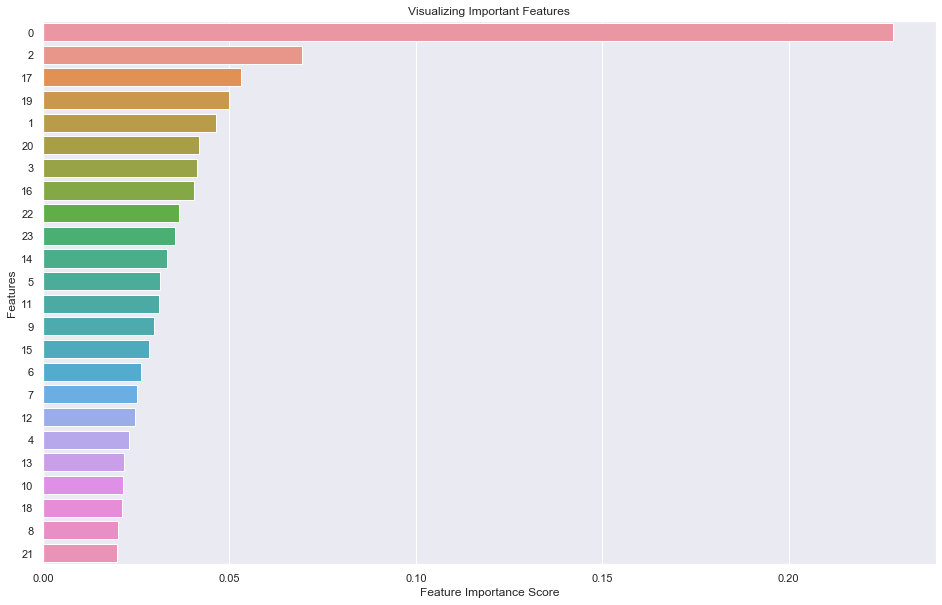

In [54]:
clf = RandomForestClassifier(n_estimators=200, max_features=0.9, criterion='entropy', max_depth=5)
clf.fit(pca_train_features,np.ravel(train_labels))
pred_labels=clf.predict(pca_test_features)
print("Accuracy:",metrics.accuracy_score(test_labels, pred_labels))
feature_imp = pd.Series(clf.feature_importances_,index=pca_test_features.columns).sort_values(ascending=False)
#feature_imp

%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()